Lets load required libraries:

## 1.Importing Libraries

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

## About the dataset:

Imagine there is criminal investigation going on and the glass left at the scene of crime can be used as evidence to solve the matter. The dataset has many types of glasses. Simply this is a classification problem.That is, given the dataset, with predefined labels, we need to build a model to be used to predict class of a new or unknown case.

Our objective is to build a classifier, to predict the class of unknown cases. We will use a specific type of classification called K nearest neighbour.

#### Attribute Information:

1. Id number: 1 to 214 
2. RI: refractive index 
3. Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10) 
4. Mg: Magnesium 
5. Al: Aluminum 
6. Si: Silicon 
7. K: Potassium 
8. Ca: Calcium 
9. Ba: Barium 
10. Fe: Iron 
11. Type of glass: (class attribute) 
-- 1 building_windows_float_processed 
-- 2 building_windows_non_float_processed 
-- 3 vehicle_windows_float_processed 
-- 4 vehicle_windows_non_float_processed (none in this database) 
-- 5 containers 
-- 6 tableware 
-- 7 headlamps

### Load data from csv file

In [2]:
filename = r"C:\Users\sadhana\Downloads\glass1.csv"
headers = ["Id","RI","Na","Mg","Al","Si","K","Ca","Ba","F","Glass_type"]
df = pd.read_csv(filename, names= headers)
df.head()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,F,Glass_type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [3]:
#checking the datatypes
df.dtypes

Id              int64
RI            float64
Na            float64
Mg            float64
Al            float64
Si            float64
K             float64
Ca            float64
Ba            float64
F             float64
Glass_type      int64
dtype: object

In [4]:
# unique value of glasses
print("Types Of Glasses :", df["Glass_type"].unique())

Types Of Glasses : [1 2 3 5 6 7]


There are Six types of glasses under Glass_type category.

#### Lets see how many of  each class is in our dataset

In [5]:
# counting the number of values of unique glasses
df["Glass_type"].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Glass_type, dtype: int64

 #### 76 Building windows non-float-processed,  70 building_windows_float_processed,  29 headlamps 17vehicle_windows_float_processed ,13 containers , 9  tableware 

# Feature

Lets define our feature set X

In [6]:
# columns
df.columns

Index(['Id', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'F', 'Glass_type'], dtype='object')

To use scikit-learn library we have to convert pandas dataframe to numpy array.

In [7]:
# converting the dataframe to numpy array
X=df[['Id', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'F']].values
X[0:5]

array([[1.00000e+00, 1.52101e+00, 1.36400e+01, 4.49000e+00, 1.10000e+00,
        7.17800e+01, 6.00000e-02, 8.75000e+00, 0.00000e+00, 0.00000e+00],
       [2.00000e+00, 1.51761e+00, 1.38900e+01, 3.60000e+00, 1.36000e+00,
        7.27300e+01, 4.80000e-01, 7.83000e+00, 0.00000e+00, 0.00000e+00],
       [3.00000e+00, 1.51618e+00, 1.35300e+01, 3.55000e+00, 1.54000e+00,
        7.29900e+01, 3.90000e-01, 7.78000e+00, 0.00000e+00, 0.00000e+00],
       [4.00000e+00, 1.51766e+00, 1.32100e+01, 3.69000e+00, 1.29000e+00,
        7.26100e+01, 5.70000e-01, 8.22000e+00, 0.00000e+00, 0.00000e+00],
       [5.00000e+00, 1.51742e+00, 1.32700e+01, 3.62000e+00, 1.24000e+00,
        7.30800e+01, 5.50000e-01, 8.07000e+00, 0.00000e+00, 0.00000e+00]])

Lets see our label values

In [8]:
# label set
y=df["Glass_type"].values
y[0:5]

array([1, 1, 1, 1, 1], dtype=int64)

# 2.Normalize Data

In [9]:
# normalizing the data
X= preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-1.72397593,  0.87286765,  0.28495326,  1.25463857, -0.69244192,
        -1.12708201, -0.67170546, -0.14576634, -0.35287683, -0.5864509 ],
       [-1.70778837, -0.24933347,  0.59181718,  0.63616803, -0.17046023,
         0.10231907, -0.02621325, -0.79373376, -0.35287683, -0.5864509 ],
       [-1.6916008 , -0.72131806,  0.14993314,  0.60142249,  0.19091171,
         0.43878673, -0.16453301, -0.82894938, -0.35287683, -0.5864509 ],
       [-1.67541323, -0.23283051, -0.24285268,  0.69870999, -0.31099376,
        -0.0529737 ,  0.11210651, -0.51905192, -0.35287683, -0.5864509 ],
       [-1.65922566, -0.31204471, -0.16920534,  0.65006624, -0.41137486,
         0.55525631,  0.08136879, -0.62469878, -0.35287683, -0.5864509 ]])

# 3.Train/Test Split

In [10]:
# splitting the data into train and test
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state = 4)
print("train set:", X_train.shape, y_train.shape)
print("test set:", X_test.shape, y_test.shape)

train set: (171, 10) (171,)
test set: (43, 10) (43,)


# 4.Classification

### K-nearest neighbor (KNN)

#### Training

In [11]:
# train the model at k=4
k=4
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=4, p=2,
           weights='uniform')

#### Predicting

In [12]:
# checking the preiction
yhat = neigh.predict(X_test)
yhat[0:5]

array([1, 7, 2, 1, 2], dtype=int64)

# 5.Acurracy evaluation

In [13]:
# accuracy
print("Train set Accuracy :" , metrics.accuracy_score(y_train,neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(yhat,y_test))

Train set Accuracy : 0.8888888888888888
Test set Accuracy:  0.9069767441860465


#### Lets try it with other value of k, k=5

In [14]:
k=5
neigh1 = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat1 = neigh1.predict(X_test)
print("Train set Accuracy :" , metrics.accuracy_score(y_train,neigh1.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(yhat1,y_test))

Train set Accuracy : 0.8947368421052632
Test set Accuracy:  0.9534883720930233


#### We can calculate the accuracy of KNN for different Ks.

In [15]:
Ks=10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfusionMx=[];
for n in range(1,Ks):
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    mean_acc[n-1]=metrics.accuracy_score(y_test,yhat)
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
mean_acc    

array([0.90697674, 0.93023256, 0.90697674, 0.90697674, 0.95348837,
       0.88372093, 0.90697674, 0.93023256, 0.93023256])

#### Plot model accuracy for Different number of Neighbors

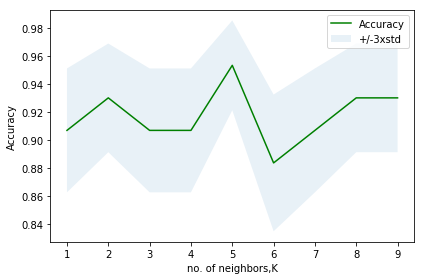

In [16]:
plt.plot(range(1,Ks),mean_acc,"g")
plt.fill_between(range(1,Ks),mean_acc-1*std_acc,mean_acc+1*std_acc,alpha=0.1)
plt.legend(("Accuracy","+/-3xstd"))
plt.xlabel("no. of neighbors,K")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.show()

In [17]:
print("The best accuracy was with ", mean_acc.max()*100,"with k=", mean_acc.argmax()+1)

The best accuracy was with  95.34883720930233 with k= 5


Hence, the models gives the accuracy of 95%